In [54]:
#Importas las librerías requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [55]:
#Cargar el dataset
data = pd.read_csv('comprar_alquilar.csv')


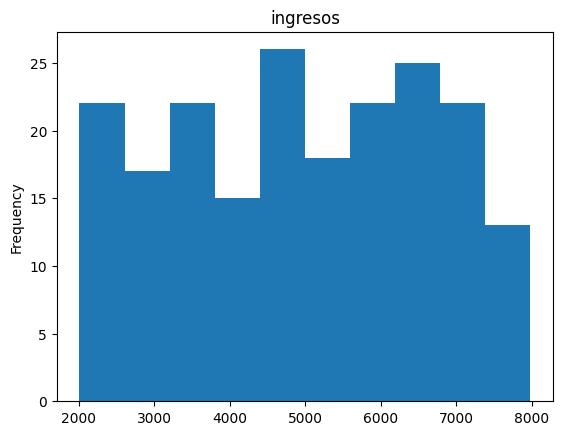

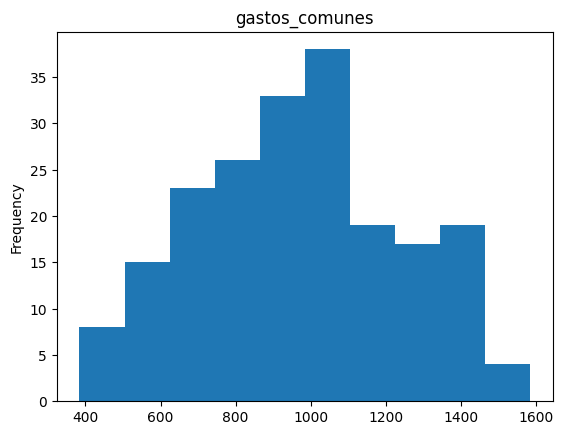

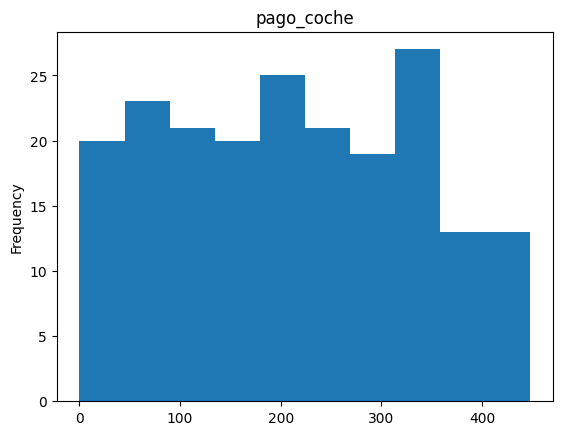

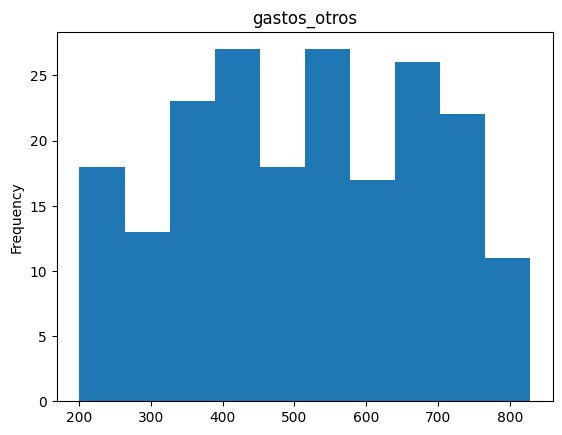

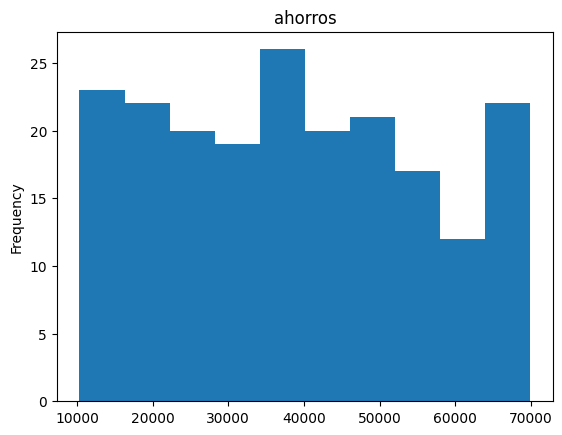

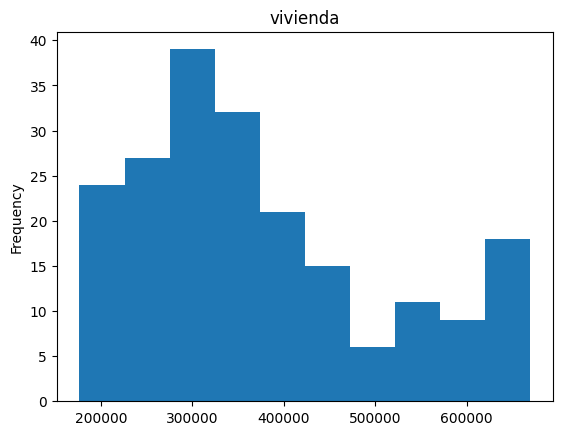

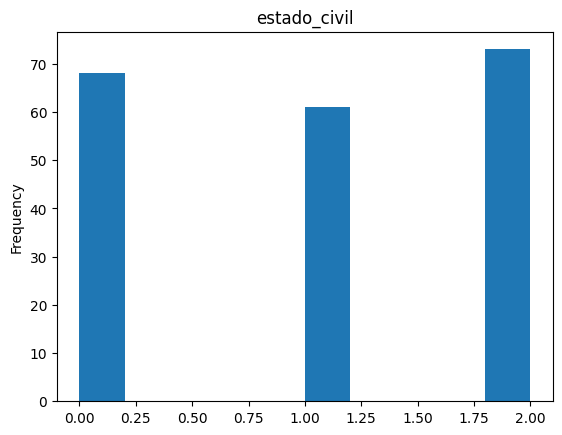

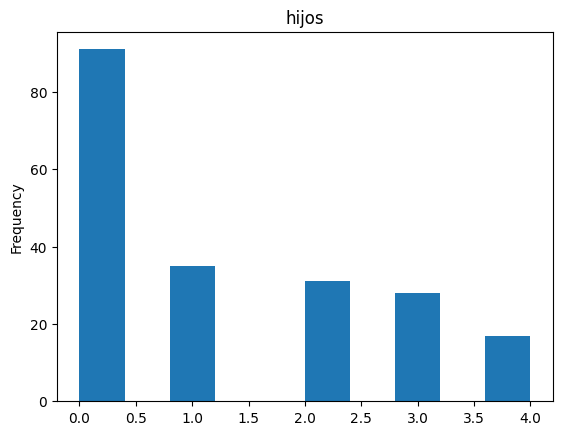

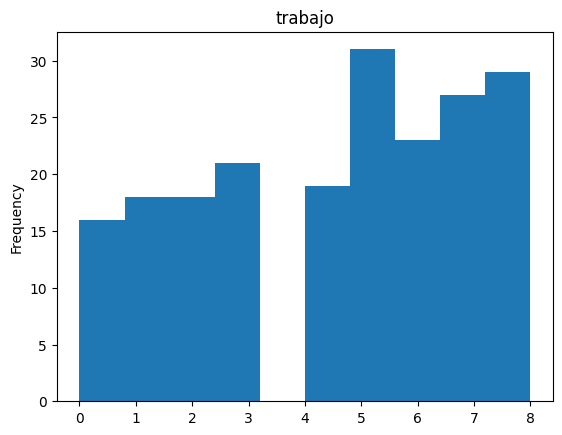

In [56]:
# Describir cada variable creando un histograma para las variables independientes
variables = data.columns[:-1]  # Todas las columnas excepto la última (comprar)

for variable in variables:
    data[variable].plot(kind='hist', title=variable)
    plt.show()

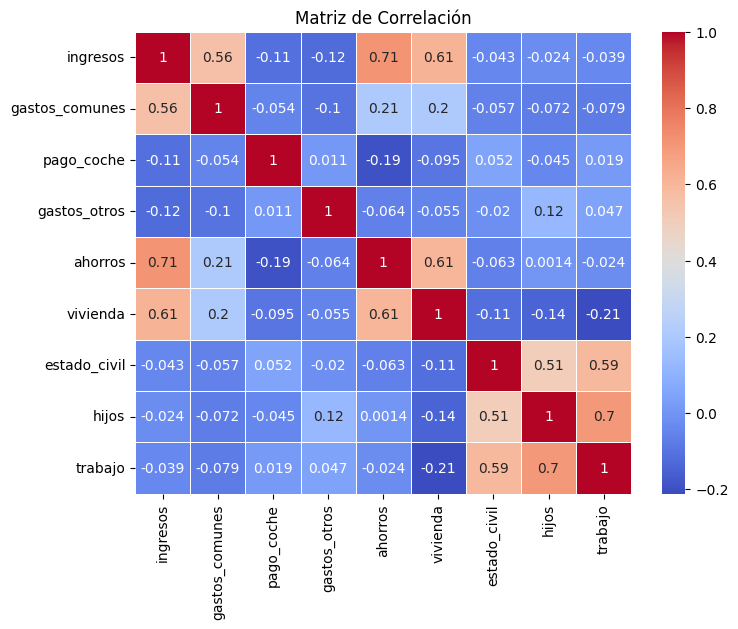

In [57]:
# Mostrar la correlación de todas las variables independientes
correlation_matrix = data[variables].corr()
correlation_matrix

# Generar un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [58]:
# Mostrar la correlación con la variable dependiente "comprar"
correlacion_vs_variabledependiente = data[variables].corrwith(data['comprar'])
correlacion_vs_variabledependiente

ingresos          0.467123
gastos_comunes    0.200191
pago_coche       -0.196468
gastos_otros     -0.110330
ahorros           0.340778
vivienda         -0.146092
estado_civil      0.142799
hijos             0.272883
trabajo           0.341537
dtype: float64

In [59]:
# Identificar las 5 variables con mayor correlación con la variable a predecir
top_5_variables_correlacion = correlacion_vs_variabledependiente.abs().nlargest(5)
top_5_variables_correlacion

ingresos          0.467123
trabajo           0.341537
ahorros           0.340778
hijos             0.272883
gastos_comunes    0.200191
dtype: float64

In [60]:
# Evaluar la posibilidad de multicolinealidad
# Aquí puedes calcular el VIF para cada variable si lo deseas.

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables_independientes = data.drop(columns=['comprar'])
vif_data = pd.DataFrame()
vif_data["Variable"] = variables_independientes.columns
vif_data["VIF"] = [variance_inflation_factor(variables_independientes.values, i) for i in range(variables_independientes.shape[1])]

# Identificar las 5 variables con el VIF más alto
top_5_vif = vif_data.sort_values(by='VIF', ascending=False).head(5)
print("\nLas 5 variables con el VIF más alto:")
print(top_5_vif)



Las 5 variables con el VIF más alto:
         Variable        VIF
0        ingresos  35.244275
1  gastos_comunes  17.913584
5        vivienda  15.042489
4         ahorros  14.924594
8         trabajo   9.122195


In [61]:
#Utilizar el método feature selection de SkLearn para seleccionar las 5 mejores variables

X = data[variables]
y = data['comprar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features_to_select = 5
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [62]:
# Entrenar dos modelos: uno con todas las variables y otro con las 5 mejores
model_all_features = LinearRegression()
model_selected_features = LinearRegression()

model_all_features.fit(X_train, y_train)
model_selected_features.fit(X_train_selected, y_train)

LinearRegression()

In [63]:
# Comparar ambos modelos y elegir el mejor en términos de precisión (accuracy)
from sklearn.metrics import accuracy_score

y_pred_all_features = model_all_features.predict(X_test)
y_pred_selected_features = model_selected_features.predict(X_test_selected)

accuracy_all_features = accuracy_score(y_test, [1 if p > 0.5 else 0 for p in y_pred_all_features])
accuracy_selected_features = accuracy_score(y_test, [1 if p > 0.5 else 0 for p in y_pred_selected_features])

mejor_modelo = model_all_features if accuracy_all_features > accuracy_selected_features else model_selected_features
print(f'Resultados considerando todas las características = {accuracy_all_features}' )
print (f'Resultados considerando todas las características = {accuracy_selected_features}')

Resultados considerando todas las características = 0.9024390243902439
Resultados considerando todas las características = 0.7560975609756098


In [64]:
# Entrenar el modelo seleccionado con todas las observaciones
# y crear dos predicciones utilizando los datos de prueba proporcionados
nuevos_datos = pd.DataFrame({
    'ingresos': [2000, 6000],
    'gastos_comunes': [944, 944],
    'pago_coche': [0, 0],
    'gastos_otros': [245, 245],
    'ahorros': [5000, 34000],
    'vivienda': [200000, 320000],
    'estado_civil': [0, 1],
    'hijos': [0, 2],
    'trabajo': [1, 1]
})

In [65]:
# Seleccionar las mejores características para los nuevos datos
nuevos_datos_selected = selector.transform(nuevos_datos)

# Predicciones utilizando el modelo con todas las variables
prediccion_nuevos_datos_all_features = model_all_features.predict(nuevos_datos)


# Traducir las predicciones a "comprar" o "no comprar"
resultado_prediccion_all_features = ["no comprar" if prediccion <= 0.5 else "comprar" for prediccion in prediccion_nuevos_datos_all_features]

# Asignar nombres a los casos
casos = ["Primer caso", "Segundo caso"]

# Crear un diccionario con los resultados
resultados_all_features = dict(zip(casos, resultado_prediccion_all_features))

print('Se considero el modelo con todas las variables ya que fue más alto 0.902 vs modelo con variables seleccionadas 0.756')
print("\nPredicción para nuevos datos (modelo con todas las variables):")
for caso, resultado in resultados_all_features.items():
    print(f"{caso}: {resultado}")



Se considero el modelo con todas las variables ya que fue más alto 0.902 vs modelo con variables seleccionadas 0.756

Predicción para nuevos datos (modelo con todas las variables):
Primer caso: no comprar
Segundo caso: comprar
